In [ ]:
# importig the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

In [ ]:
twitter_full=pd.read_csv("/content/Twitter_Full.csv") # loading the dataset

In [ ]:
twitter_full.head() # printing the first five rows of the dataset

,text,hashtags,labels
0,Being s mom is cleaning 24/7 the same shit ove...,"['momlife', 'kids', 'tired']",1
1,And now we have been given the walkthru book b...,['walkthru'],0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,"['Peace', 'Joy', 'Love', 'JoyTrain', 'MentalHe...",0
3,speak-no-evil monkey Can I Be Honest With You...,"['therapy', 'help', 'NLP', 'CBT', 'hypnotherap...",1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,[],0


In [ ]:
twitter_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8900 entries, 0 to 8899
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      8900 non-null   object
 1   hashtags  8892 non-null   object
 2   labels    8900 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 208.7+ KB


In [ ]:
twitter_full.isnull().sum() # Checking for the null values

,0
text,0
hashtags,8
labels,0


In [ ]:
twitter_full=twitter_full.dropna() # Removing the null values

In [ ]:
twitter_full.isnull().sum() # After removing again checking for the null values

,0
text,0
hashtags,0
labels,0


In [ ]:
twitter_full.duplicated().sum()

np.int64(373)

In [ ]:
twitter_full=twitter_full.drop_duplicates()

In [ ]:
twitter_full.duplicated().sum()

np.int64(0)

In [ ]:
twitter_full['labels'].value_counts()

,count
labels,
1,4358
0,4161


In [ ]:
twitter_full['labels'].value_counts(normalize=True) * 100

,proportion
labels,
1,51.156239
0,48.843761


In [ ]:
twitter_full['text']=twitter_full['text'].str.lower()
twitter_full['hashtags']=twitter_full['hashtags'].str.lower()

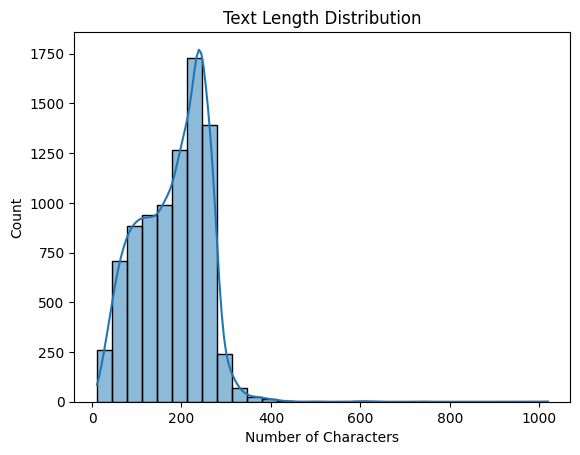

In [ ]:
twitter_full['text_length'] = twitter_full['text'].apply(len)
sns.histplot(twitter_full['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Characters")
plt.show()

In [ ]:
stress_text = " ".join(twitter_full[twitter_full['labels'] == 1]['text'])
nonstress_text = " ".join(twitter_full[twitter_full['labels'] == 0]['text'])

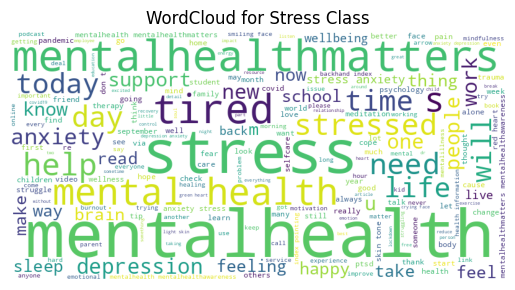

In [ ]:
wc = WordCloud(width=800, height=400, background_color='white').generate(stress_text)
plt.imshow(wc)
plt.axis('off')
plt.title("WordCloud for Stress Class")
plt.show()

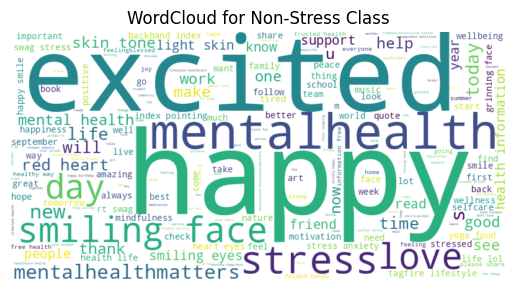

In [ ]:
wc = WordCloud(width=800, height=400, background_color='white').generate(nonstress_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Non-Stress Class")
plt.show()

In [ ]:
# importig the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
twitter_full.head() # printing the first five rows of the dataset

,text,hashtags,labels,text_length
0,being s mom is cleaning 24/7 the same shit ove...,"['momlife', 'kids', 'tired']",1,131
1,and now we have been given the walkthru book b...,['walkthru'],0,128
2,wishing you peace joy & love! joytrain mentalh...,"['peace', 'joy', 'love', 'joytrain', 'mentalhe...",0,166
3,speak-no-evil monkey can i be honest with you...,"['therapy', 'help', 'nlp', 'cbt', 'hypnotherap...",1,227
4,psy do u hv any regrets? me no psy are you hap...,[],0,196


In [ ]:
twitter_full.isnull().sum() # Checking for the null values

,0
text,0
hashtags,0
labels,0
text_length,0


In [ ]:
twitter_full=twitter_full.dropna() # Removing the null values

In [ ]:
twitter_full.isnull().sum() # After removing again checking for the null values

,0
text,0
hashtags,0
labels,0
text_length,0


In [ ]:
twitter_full.duplicated().sum()

np.int64(2)

In [ ]:
twitter_full=twitter_full.drop_duplicates()

In [ ]:
twitter_full.duplicated().sum()

np.int64(0)

In [ ]:
twitter_full['text']=twitter_full['text'].str.lower()
twitter_full['hashtags']=twitter_full['hashtags'].str.lower()

In [ ]:
twitter_full['text']=twitter_full['text'].str.replace(r'\d+', '', regex=True) #remove numbers
twitter_full.head(10)

,text,hashtags,labels,text_length
0,being s mom is cleaning / the same shit over a...,"['momlife', 'kids', 'tired']",1,131
1,and now we have been given the walkthru book b...,['walkthru'],0,128
2,wishing you peace joy & love! joytrain mentalh...,"['peace', 'joy', 'love', 'joytrain', 'mentalhe...",0,166
3,speak-no-evil monkey can i be honest with you...,"['therapy', 'help', 'nlp', 'cbt', 'hypnotherap...",1,227
4,psy do u hv any regrets? me no psy are you hap...,[],0,196
5,police car light new product alert! police ca...,['sensory'],0,193
6,"ordered my nd ribble years after the st one, ...","['ribble', 'excited']",0,156
7,starting the day with a cleanse. hot water wit...,[],1,239
8,welcoming september fallen leaf leaf flutterin...,"['sweetandspecial', 'simplydelicioussimplyswee...",0,298
9,samsunggalaxy zflip g go here on amazon phone ...,"['samsunggalaxy', 'zflip3', 'amazon', 'phone',...",0,220


In [ ]:
twitter_full['text'] = twitter_full['text'].str.replace(r'[^\w\s]', '', regex=True) # removes punctuation
twitter_full.head(10)

,text,hashtags,labels,text_length
0,being s mom is cleaning the same shit over an...,"['momlife', 'kids', 'tired']",1,131
1,and now we have been given the walkthru book b...,['walkthru'],0,128
2,wishing you peace joy love joytrain mentalhea...,"['peace', 'joy', 'love', 'joytrain', 'mentalhe...",0,166
3,speaknoevil monkey can i be honest with you g...,"['therapy', 'help', 'nlp', 'cbt', 'hypnotherap...",1,227
4,psy do u hv any regrets me no psy are you happ...,[],0,196
5,police car light new product alert police car...,['sensory'],0,193
6,ordered my nd ribble years after the st one o...,"['ribble', 'excited']",0,156
7,starting the day with a cleanse hot water with...,[],1,239
8,welcoming september fallen leaf leaf flutterin...,"['sweetandspecial', 'simplydelicioussimplyswee...",0,298
9,samsunggalaxy zflip g go here on amazon phone ...,"['samsunggalaxy', 'zflip3', 'amazon', 'phone',...",0,220


In [ ]:
twitter_full['text'] = twitter_full['text'].apply(word_tokenize)

In [ ]:
stop_words = set(stopwords.words('english'))
def removestopwords(tokens):
    return [w for w in tokens if w.lower() not in stop_words]
twitter_full['text'] = twitter_full['text'].apply(removestopwords)

In [ ]:
twitter_full['text'] = twitter_full['text'].apply(lambda tokens: ' '.join(tokens))

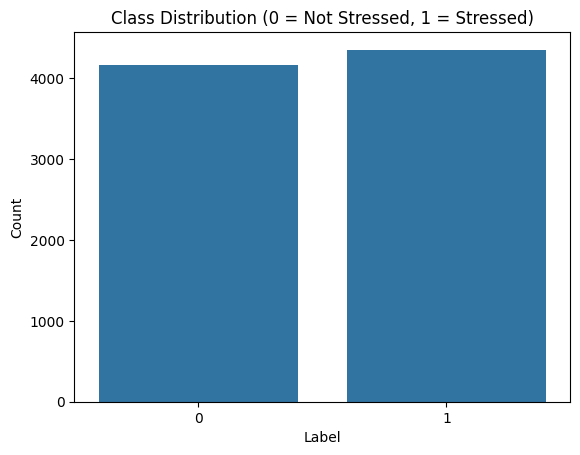

In [ ]:
# Class distribution
sns.countplot(x='labels', data=twitter_full)
plt.title("Class Distribution (0 = Not Stressed, 1 = Stressed)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

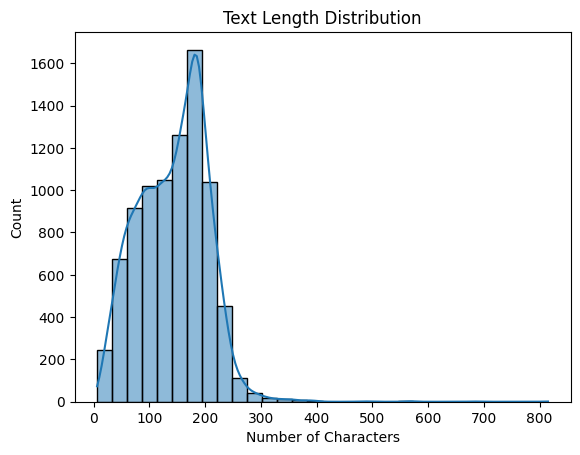

In [ ]:
# Text length distribution
twitter_full['text_length'] = twitter_full['text'].apply(len)
sns.histplot(twitter_full['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Characters")
plt.show()

In [ ]:
import pandas as pd
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(twitter_full, test_size=0.2)

In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True, max_length=512)

# Convert pandas DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/6813 [00:00<?, ? examples/s]

Map:   0%|          | 0/1704 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipython-input-966030080.py:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.400800,0.316379
2,0.256500,0.305393
3,0.192900,0.320346


TrainOutput(global_step=639, training_loss=0.28340049827229435, metrics={'train_runtime': 230.5149, 'train_samples_per_second': 88.667, 'train_steps_per_second': 2.772, 'total_flos': 634570584639840.0, 'train_loss': 0.28340049827229435, 'epoch': 3.0})

In [ ]:
results = trainer.evaluate()
print(f"Evaluation Results: {results}")

Evaluation Results: {'eval_loss': 0.3203456997871399, 'eval_runtime': 4.9107, 'eval_samples_per_second': 346.998, 'eval_steps_per_second': 10.996, 'epoch': 3.0}


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions (logits) from the trainer on test dataset
predictions_output = trainer.predict(tokenized_test)

# predictions_output.predictions are logits; get predicted classes by taking argmax
y_pred = np.argmax(predictions_output.predictions, axis=1)

# True labels
y_true = predictions_output.label_ids

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[733  85]
 [121 765]]


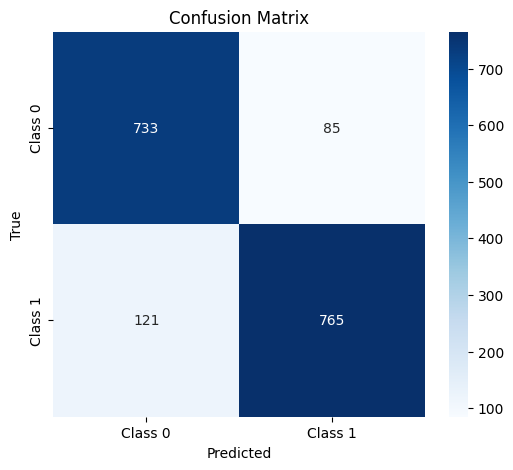

In [ ]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset

train_df["hashtags"] = train_df["hashtags"].fillna("").astype(str)
test_df["hashtags"] = test_df["hashtags"].fillna("").astype(str)

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples["hashtags"], truncation=True, padding=True, max_length=512)

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/6813 [00:00<?, ? examples/s]

Map:   0%|          | 0/1704 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipython-input-966030080.py:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.522100,0.491598
2,0.461100,0.499481
3,0.428900,0.499401


TrainOutput(global_step=639, training_loss=0.47069654628890967, metrics={'train_runtime': 307.682, 'train_samples_per_second': 66.429, 'train_steps_per_second': 2.077, 'total_flos': 866923576390224.0, 'train_loss': 0.47069654628890967, 'epoch': 3.0})

In [ ]:
results = trainer.evaluate()
print(f"Evaluation Results: {results}")

Evaluation Results: {'eval_loss': 0.4994012415409088, 'eval_runtime': 6.779, 'eval_samples_per_second': 251.366, 'eval_steps_per_second': 7.966, 'epoch': 3.0}


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions (logits) from the trainer on test dataset
predictions_output = trainer.predict(tokenized_test)

# predictions_output.predictions are logits; get predicted classes by taking argmax
y_pred = np.argmax(predictions_output.predictions, axis=1)

# True labels
y_true = predictions_output.label_ids

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[534 284]
 [140 746]]


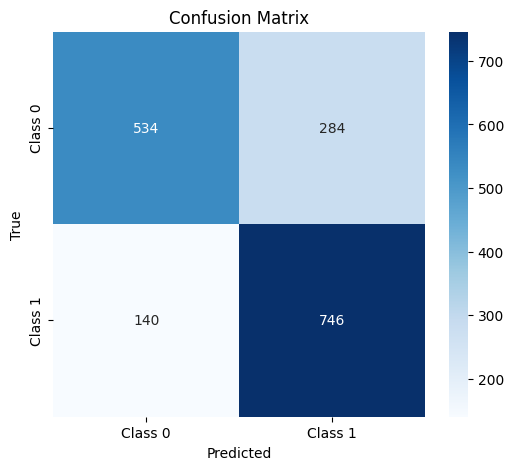

In [ ]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
